In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from modules import *

In [3]:
path = "../data/lineas_completas/REG804.json"

with open(path, 'r') as archivo:
    data = json.load(archivo)
    
print(len(data))

# Desplegamos la estructura de datos para un elemento (listas, diccionaros, n elementos...)
element = data[10]
print_element(element)

155

OBJECTID_VANO_2D: 15

ID_VANO: G_13578475_13578503

LONGITUD_2D: 161.88580930816013

COORDENADA_X_INICIO: 119680.86639999971

COORDENADA_Y_INICIO: 4695388.431299999

COORDENADA_X_FIN: 119842.54320000019

COORDEANDA_Y_FIN: 4695380.207699999

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 157
    COD_APOYO: 13578503
    COORDENADA_X: 119680.86639999971
    COORDEANDA_Y: 4695388.431299999
    COORDENADAS_Z: [923.9784999999974, 930.0492999999988]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 3
    OBJECTID_VANO_3D: 631
    LONGITUD_2D: 161.62690508919917
    LONGITUD_3D: 163.754105368576
    VERTICES: [[119842.52759999968, 4695381.5911, 957.5022999999928], [119833.55910000019, 4695382.0328, 955.4238000000041], [119824.59080000035, 4695382.476199999, 953.4251999999979], [119815.62249999959, 4695382.9213, 951.5065000000031], [119806.65429999959, 4695383.368000001, 949.6674999999959], [119797.68620000035, 4695383.816400001, 947.9079999999958], [119788.7182, 4695384.2664, 

In [157]:
cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, 0)

In [4]:
all_extremos = []

for i in range(len(data)):
    
    try:
        cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    except:
        print_element(data[i])
    
    all_extremos.append(extremos_values)

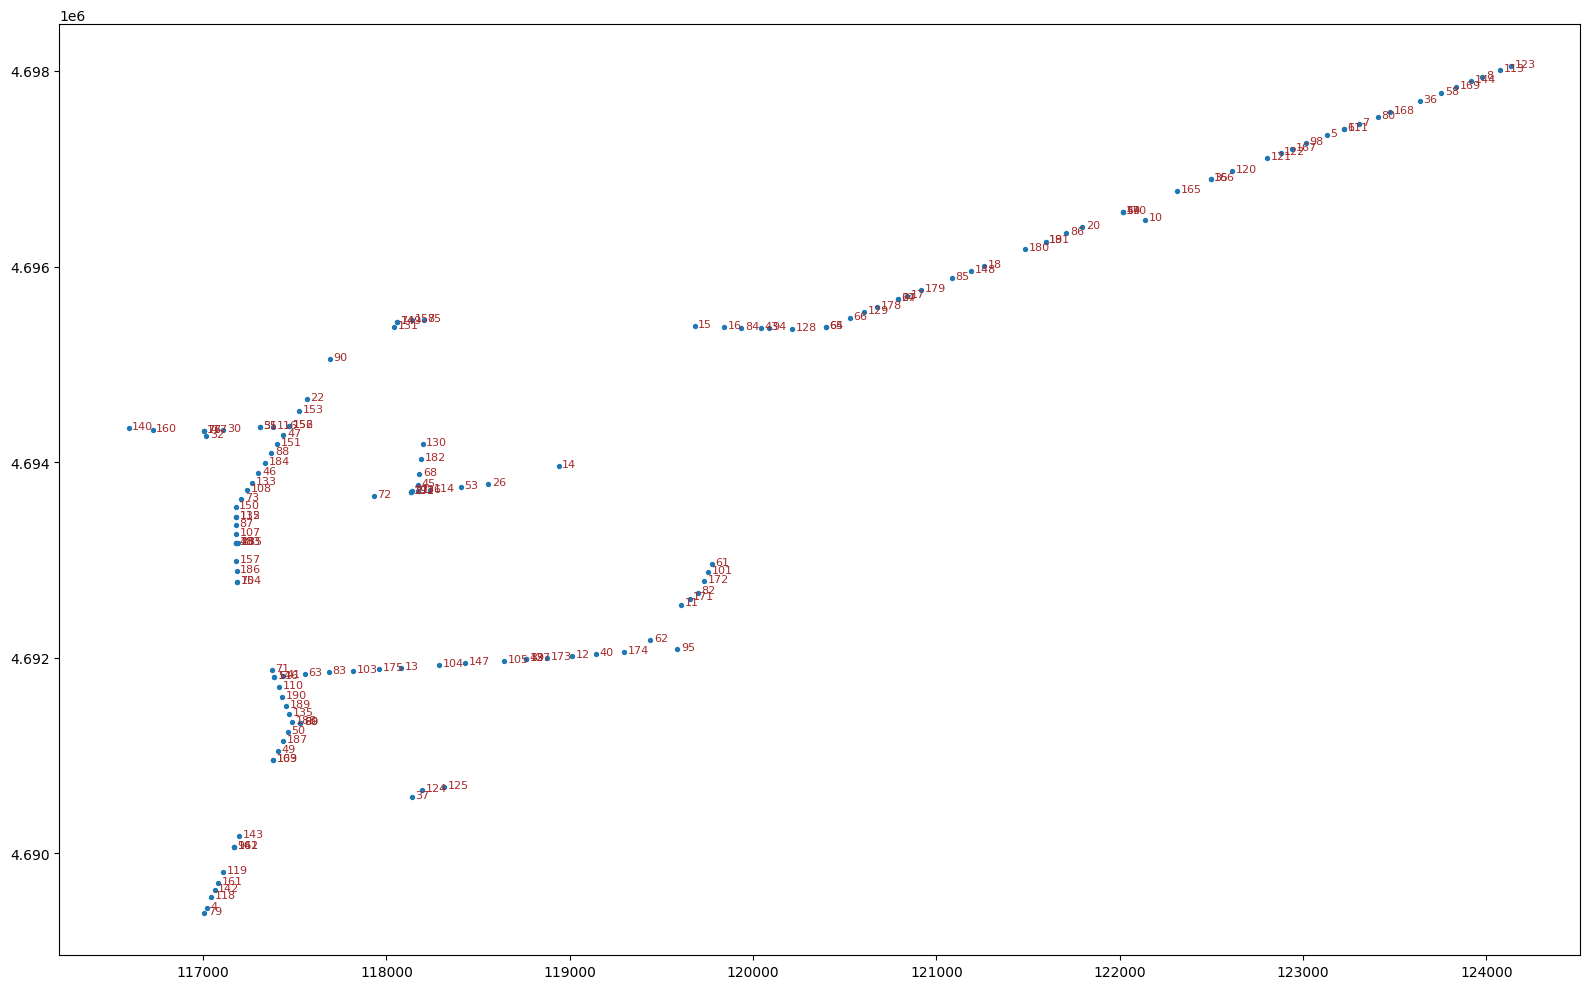

In [5]:
first_extremos = []
last_extremos = []

plt.figure(figsize=(16,10))

for i in range(len(all_extremos)):
    first_extremos.append(np.array([all_extremos[i][0][0], all_extremos[i][1][0], all_extremos[i][2][0]]))
    # last_extremos.append(np.array([all_extremos[i][0][2], all_extremos[i][1][2], all_extremos[i][2][0][1]]))
    
first_extremos = np.array(first_extremos)
# last_extremos = np.array(last_extremos)

plt.scatter(first_extremos[:,0], first_extremos[:,1], s = 8)
# plt.scatter(last_extremos[:,0], last_extremos[:,1], s = 3)

for i in range(len(all_extremos)):
    plt.text(first_extremos[i,0]+20, first_extremos[i,1]-10, s = str(data[i]["OBJECTID_VANO_2D"]), size = 8, color = "brown")

plt.tight_layout()

In [160]:
# parejas = []
# parejas_ids = []

# for j in range(len(data)):
#     _, _, _, extremos_values0 = extract_vano_values(data, j)
#     extremos_set0 = set([extremos_values0[0][0], extremos_values0[1][0]])

#     for i in range(j + 1, len(data)):
#         _, _, _, extremos_values = extract_vano_values(data, i)
#         extremos_set = set([extremos_values[0][0], extremos_values[1][0]])
        
#         # Check for any intersection between the two sets
#         if extremos_set0.intersection(extremos_set):
#             print(i, j)
#             parejas.append((i, j))
#             parejas_ids.append((data[i]["ID_VANO"], data[j]["ID_VANO"]))


In [161]:
parejas = []
parejas_ids = []


for j in range(len(data)):

    _, _, _, extremos_values0 = extract_vano_values(data, j)

    for i in range(j,len(data)):
        
        _, _, _, extremos_values = extract_vano_values(data, i)
        
        # cond1 = (extremos_values[0][0] == extremos_values0[0][0])
        # cond2 = (extremos_values[1][0] == extremos_values0[1][0])
        
        # cond3 = (extremos_values[0][0] == extremos_values0[1][0])
        # cond4 = (extremos_values[1][0] == extremos_values0[0][0])
        
                
        if i != j:
            
            break_loops = False
            
            for k in range(np.array(extremos_values0).shape[1]):
                for h in range(np.array(extremos_values).shape[1]):
                    # print(extremos_values)
                    if (np.array(extremos_values0)[:,k] == np.array(extremos_values)[:,h]).all():
                        
                        print(i, j)
                        parejas.append((i,j))
                        parejas_ids.append((data[i]["ID_VANO"], data[j]["ID_VANO"]))
                        break_loops = True
                        break
                    
                if break_loops:
                    break
                    

62 0
91 0
2 1
75 1
85 1
3 2
85 2
63 3
86 4
112 4
134 5
135 6
29 7
137 7
79 8
139 8
11 10
66 11
52 12
141 12
115 13
142 14
143 14
33 15
68 15
34 16
154 16
120 17
37 18
123 18
145 18
52 19
140 19
41 20
56 21
153 21
154 21
23 22
60 22
42 23
61 24
93 25
130 25
43 26
132 26
97 27
31 28
107 28
137 28
138 29
48 30
113 30
80 31
107 31
66 32
72 32
44 33
134 33
53 34
104 35
146 35
118 36
119 36
122 36
145 37
147 37
83 38
149 38
149 39
150 39
55 40
84 40
113 40
87 41
89 42
133 43
134 44
76 45
77 46
65 48
50 49
99 49
51 50
100 51
140 52
144 53
121 54
148 54
82 57
117 57
116 58
124 58
124 59
61 60
90 60
90 61
132 63
135 64
136 64
78 65
115 67
141 67
143 68
81 69
88 69
103 69
118 70
146 70
99 72
92 74
109 74
127 74
131 75
136 77
139 78
114 79
114 80
145 81
104 82
128 83
113 84
152 84
96 86
106 87
103 88
122 89
125 90
110 91
126 92
94 93
95 94
131 95
98 97
140 100
144 101
116 102
117 103
150 105
151 105
153 106
125 108
127 109
126 110
127 111
133 112
124 116
120 119
122 119
148 123
130 129
152 151
15

In [11]:
len(parejas), len(np.array(parejas).flatten())

(31, 62)

In [162]:
conjunto = set(np.array(parejas).flatten())
flat_data = np.array(parejas).flatten()

In [163]:
# Encontrar los vanos que no conectan = discontinuidades
aislados = []
aislados_ids = []

for i in range(len(data)):
    
    if i not in conjunto:
        print(f"Aislado: {i}")
        
        aislados.append(i)
        aislados_ids.append(data[i]["ID_VANO"])

Aislado: 9
Aislado: 47
Aislado: 71
Aislado: 73


In [164]:
# Encontrar los vanos que aparecen 2 veces = tenemos los dos apoyos
completos = []
incompletos = []

completos_ids = []
incompletos_ids = []

for i in range(len(data)):
    
    if i in flat_data:
        if sum(i == flat_data) > 1:
            print(f"Completo: {i}")
            completos.append(i)
            completos_ids.append(data[i]["ID_VANO"])
        else:
            print(f"Incompleto: {i}")
            incompletos.append(i)
            incompletos_ids.append(data[i]["ID_VANO"])

Completo: 0
Completo: 1
Completo: 2
Completo: 3
Completo: 4
Incompleto: 5
Incompleto: 6
Completo: 7
Completo: 8
Incompleto: 10
Completo: 11
Completo: 12
Incompleto: 13
Completo: 14
Completo: 15
Completo: 16
Incompleto: 17
Completo: 18
Completo: 19
Incompleto: 20
Completo: 21
Completo: 22
Completo: 23
Incompleto: 24
Completo: 25
Completo: 26
Incompleto: 27
Completo: 28
Completo: 29
Completo: 30
Completo: 31
Completo: 32
Completo: 33
Completo: 34
Completo: 35
Completo: 36
Completo: 37
Completo: 38
Completo: 39
Completo: 40
Completo: 41
Completo: 42
Completo: 43
Completo: 44
Incompleto: 45
Incompleto: 46
Completo: 48
Completo: 49
Completo: 50
Completo: 51
Completo: 52
Completo: 53
Completo: 54
Incompleto: 55
Incompleto: 56
Completo: 57
Completo: 58
Incompleto: 59
Completo: 60
Completo: 61
Incompleto: 62
Completo: 63
Completo: 64
Completo: 65
Completo: 66
Completo: 67
Completo: 68
Completo: 69
Completo: 70
Completo: 72
Completo: 74
Completo: 75
Incompleto: 76
Completo: 77
Completo: 78
Comp

In [165]:
# Conjuntos totalmente independientes

print(f"Vanos completos: {completos}")
print(f"Vanos incompletos: {incompletos}")
print(f"Vanos aislados: {aislados}")

print(f"Parejas que comparten apoyo{parejas}")

Vanos completos: [0, 1, 2, 3, 4, 7, 8, 11, 12, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154]
Vanos incompletos: [5, 6, 10, 13, 17, 20, 24, 27, 45, 46, 55, 56, 59, 62, 76, 96, 98, 101, 102, 108, 111, 121, 128, 129, 138, 142, 147]
Vanos aislados: [9, 47, 71, 73]
Parejas que comparten apoyo[(62, 0), (91, 0), (2, 1), (75, 1), (85, 1), (3, 2), (85, 2), (63, 3), (86, 4), (112, 4), (134, 5), (135, 6), (29, 7), (137, 7), (79, 8), (139, 8), (11, 10), (66, 11), (52, 12), (141, 12), (115, 13), (142, 14), (143, 14), (33, 15), (68, 15), (34, 16), (

In [166]:
_, apoyo_values0, _, extremos_values0 = extract_vano_values(data, parejas[1][0])
_, apoyo_values1, _, extremos_values1 = extract_vano_values(data, parejas[1][1])

extremos_values0, extremos_values1

([array([117045.151 , 117045.151 , 117062.2088, 117062.2088]),
  array([4689550.816 , 4689550.816 , 4689622.5798, 4689622.5798]),
  array([542.3611, 554.4915, 543.0632, 553.1132])],
 [array([117018.9057, 117018.9057, 117045.151 , 117045.151 ]),
  array([4689441.2102, 4689441.2102, 4689550.816 , 4689550.816 ]),
  array([547.8001, 558.4423, 542.3611, 554.4915])])


Processing vano 0
Distance between mean points: 113.38800673699025

Processing vano 1
Distance between mean points: 111.44286061456818

Processing vano 2
Distance between mean points: 99.83247933962397

Processing vano 3
Distance between mean points: 126.40384142419535

Processing vano 4
Distance between mean points: 122.59339599000718

Processing vano 5
Distance between mean points: 110.18481151977127

Processing vano 6
Distance between mean points: 76.56452907017562

Processing vano 7
Distance between mean points: 130.4980142429612

Processing vano 8
Distance between mean points: 210.2700097944709

Processing vano 9
Distance between mean points: 222.06800642207068

Processing vano 10
Distance between mean points: 164.2093309325779

Processing vano 11
Distance between mean points: 99.53477297978759

Processing vano 12
Distance between mean points: 95.75936638380405

Processing vano 13
Distance between mean points: 97.69968420113601

Processing vano 14
Distance between mean points: 13

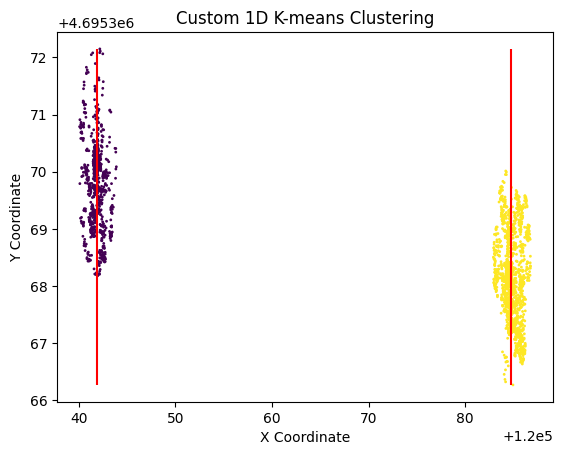


Processing vano 33
Distance between mean points: 191.09285683492647

Processing vano 34
Distance between mean points: 105.10129053196367

Processing vano 35
Distance between mean points: 104.26729726779708

Processing vano 36
Distance between mean points: 90.50593073671168

Processing vano 37
Distance between mean points: 8.290843995451842

Processing vano 38
Distance between mean points: 104.31818493738304

Processing vano 39
Distance between mean points: 99.01285487568221

Processing vano 40
Distance between mean points: 72.50326522494329

Processing vano 41
Distance between mean points: 151.52650024005575

Processing vano 42
Distance between mean points: 70.59799343212177

Processing vano 43
Distance between mean points: 102.83770245083096

Processing vano 44
Distance between mean points: 13.84971676522139

Processing vano 45
Distance between mean points: 45.38241513299071

Processing vano 46
Distance between mean points: 83.12886425273886

Processing vano 47
Distance between mean 

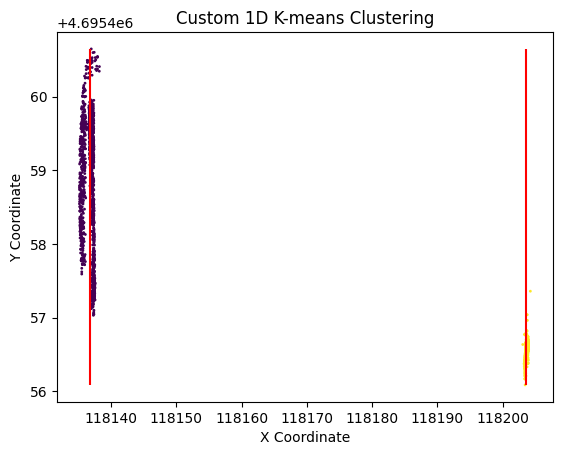


Processing vano 60
Distance between mean points: 109.62913188596772

Processing vano 61
Distance between mean points: 54.242190808029356

Processing vano 62
Distance between mean points: 50.796762063026556

Processing vano 63
Distance between mean points: 80.75000158133297

Processing vano 64
Distance between mean points: 127.46851374869296

Processing vano 65
Distance between mean points: 133.2012058619677

Processing vano 66
Distance between mean points: 114.77868209838509

Processing vano 67
Distance between mean points: 131.27728646762515

Processing vano 68
Distance between mean points: 104.74063376638371

Processing vano 69
Distance between mean points: 77.35260060710642

Processing vano 70
Distance between mean points: 98.34909339058221

Processing vano 71
Distance between mean points: 127.94967742851624

Processing vano 72
Distance between mean points: 128.92341684710198

Processing vano 73
Distance between mean points: 179.49645165735268

Processing vano 74
Distance between m

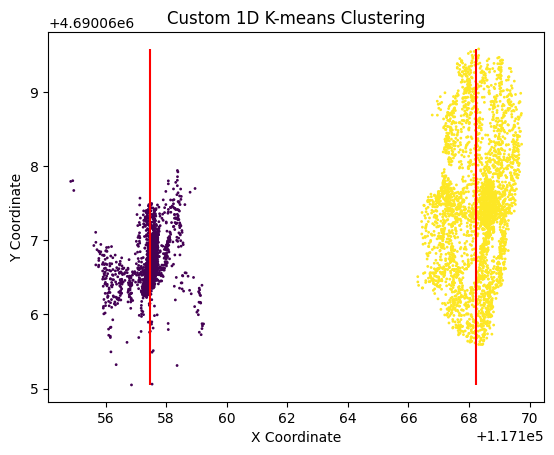


Processing vano 110
Distance between mean points: 74.34953401978875

Processing vano 111
Distance between mean points: 77.73274461483963

Processing vano 112
Distance between mean points: 74.33613524336722

Processing vano 113
Distance between mean points: 44.128537120428305

Processing vano 114
Distance between mean points: 105.59920562486543

Processing vano 115
Distance between mean points: 86.70758726209549

Processing vano 116
Distance between mean points: 55.34500633880708

Processing vano 117
Distance between mean points: 92.84333001088939

Processing vano 118
Distance between mean points: 104.04371025188497

Processing vano 119
Distance between mean points: 163.35208663361135

Processing vano 120
Distance between mean points: 131.17426214297274

Processing vano 121
Distance between mean points: 1.9021780769898822
Invertir coordenadas


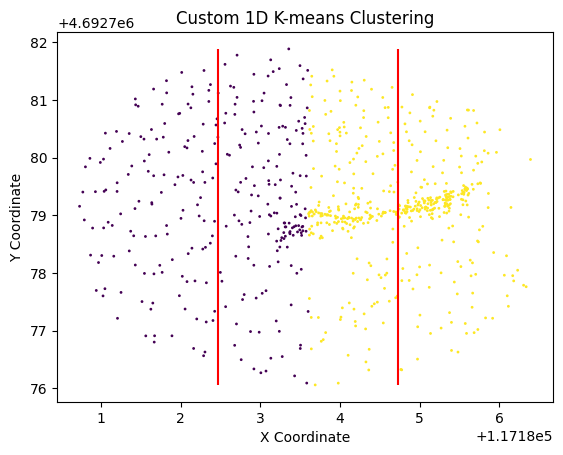

Proportional absolut error of distance = 87.6300425782506
SOLO HAY 1 APOYO


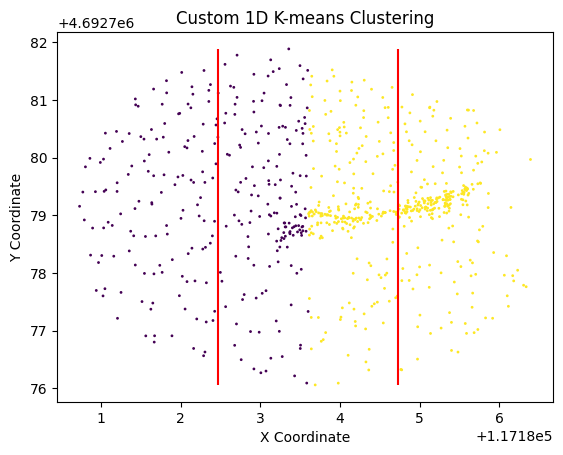


Processing vano 122
Distance between mean points: 27.74039298367319
Invertir coordenadas


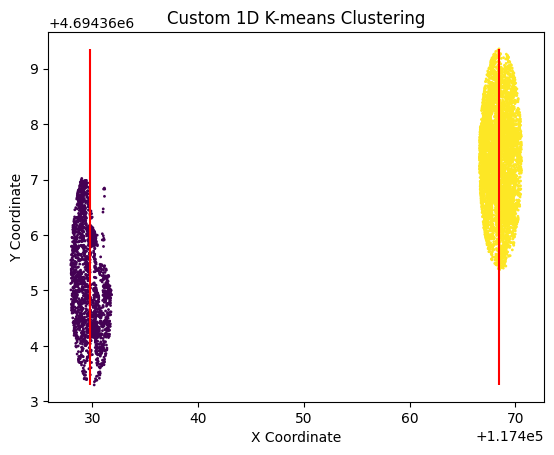


Processing vano 123
Distance between mean points: 94.19152824941827

Processing vano 124
Distance between mean points: 83.42356482360687

Processing vano 125
Distance between mean points: 145.76779481268983

Processing vano 126
Distance between mean points: 123.45190047676223

Processing vano 127
Distance between mean points: 112.92821022668262

Processing vano 128
Distance between mean points: 19.916959234180286

Processing vano 129
Distance between mean points: 111.43776220796815

Processing vano 130
Distance between mean points: 110.27732316457858

Processing vano 131
Distance between mean points: 91.10613613884296

Processing vano 132
Distance between mean points: 201.98563262816234

Processing vano 133
Distance between mean points: 96.88145510194819

Processing vano 134
Distance between mean points: 34.264408652073136

Processing vano 135
Distance between mean points: 76.52409603466866

Processing vano 136
Distance between mean points: 88.89994174364507

Processing vano 137
Dista

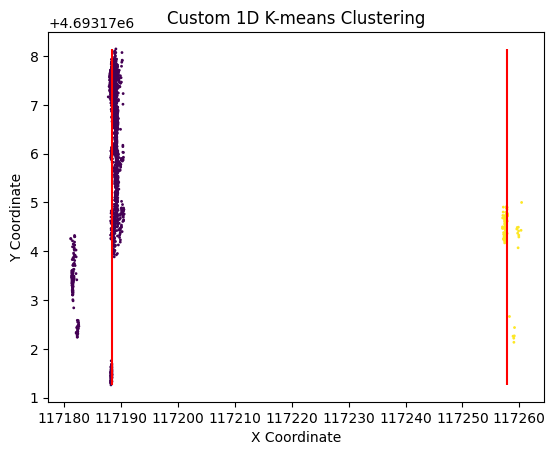


Processing vano 148
Distance between mean points: 100.14631566278557

Processing vano 149
Distance between mean points: 97.4344177234779

Processing vano 150
Distance between mean points: 82.56971632443974

Processing vano 151
Distance between mean points: 104.02328324202482

Processing vano 152
Distance between mean points: 95.31625418930192

Processing vano 153
Distance between mean points: 39.13528106350951

Processing vano 154
Distance between mean points: 15.535795695130178


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Separmos los apoyos lidar
apoyos_separados = dict()

for i in range(len(data)):

    print(f"\nProcessing vano {i}")

    cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    
    rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
    
    invertedxy = np.zeros((np.array(rotated_apoyos).shape))

    invertedxy[1,:] = (np.array(apoyo_values))[0,:]
    invertedxy[0,:] = (np.array(apoyo_values))[1,:]
    invertedxy[2,:] = (np.array(apoyo_values))[2,:]
    
    labels, centroids = kmeans_clustering(invertedxy, 2, 100)

    apoyos = []
    extremos = []
    

    for lab in np.unique(labels):

        apoyo = np.array(apoyo_values)[:, labels == lab]

        mean_x = np.mean(apoyo[0,:])
        mean_y = np.mean(apoyo[1,:])
        mean_z = np.mean(apoyo[2,:])
        
        c_mass = np.array([mean_x, mean_y, mean_z])
        extremos.append(c_mass)
        apoyos.append(apoyo)


    dist = np.linalg.norm(np.array(extremos)[0,:] - np.array(extremos)[1,:])
    extremos = np.array(extremos).T

    print(f"Distance between mean points: {dist}")

    if 100*abs(dist - data[i]["LONGITUD_2D"])/data[i]["LONGITUD_2D"] > 10.0:
        
        points = np.array(apoyo_values)
        
        labels, centroids = kmeans_clustering(points, 2, 100)
            
        apoyos = []
        extremos = []

        for lab in np.unique(labels):

            apoyo = np.array(apoyo_values)[:, labels == lab]

            mean_x = np.mean(apoyo[0,:])
            mean_y = np.mean(apoyo[1,:])
            mean_z = np.mean(apoyo[2,:])
            
            c_mass = np.array([mean_x, mean_y, mean_z])
            extremos.append(c_mass)
            apoyos.append(apoyo)
        
        print("Invertir coordenadas")
        dist = np.linalg.norm(np.array(extremos)[0,:] - np.array(extremos)[1,:])
        extremos = np.array(extremos).T
        
        plt.scatter(points[0], points[1], c=labels, cmap='viridis', s=1)
        plt.vlines(centroids, ymin=np.min(points[1]), ymax=np.max(points[1]), color='red')
        plt.title('Custom 1D K-means Clustering')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

        
        if 100*abs(dist - data[i]["LONGITUD_2D"])/data[i]["LONGITUD_2D"] > 10.0:
            
            print(f"Proportional absolut error of distance = {100*abs(dist - data[i]['LONGITUD_2D'])/data[i]['LONGITUD_2D']}")
            print("SOLO HAY 1 APOYO")
            
            plt.scatter(points[0], points[1], c=labels, cmap='viridis', s=1)
            plt.vlines(centroids, ymin=np.min(points[1]), ymax=np.max(points[1]), color='red')
            plt.title('Custom 1D K-means Clustering')
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.show()
            continue

    apoyos_separados[i] = apoyos

In [125]:
cond = apoyos_separados[parejas[1][0]][0] == apoyos_separados[parejas[1][1]][1]

cond = cond == False

cond.sum(axis = 0).sum(axis = 0)

0

In [146]:
cond_values0, apoyo_values0, vert_values0, extremos_values0 = extract_vano_values(data, 37)
cond_values1, apoyo_values1, vert_values1, extremos_values1 = extract_vano_values(data, 18)

np.array(extremos_values0)[:,3], np.array(extremos_values1)[:,3]

(array([1.17188942e+05, 4.69317588e+06, 5.90469200e+02]),
 array([1.17181087e+05, 4.69308190e+06, 5.90142800e+02]))

In [133]:
apoyos_separados[37][1] == apoyos_separados[18][1]

ValueError: operands could not be broadcast together with shapes (3,1594) (3,1562) 

In [129]:
cond = apoyos_separados[37][0] == apoyos_separados[18][1]
            
if (cond == True).any():
    
    cond = (cond == False)
    
    if cond.sum(axis = 0).sum(axis = 0) != 0:
        print(f"Some points are the same but not all in {pareja}")
        print(cond.sum(axis = 0).sum(axis = 0))
        
    found = True

else:
    pass

ValueError: operands could not be broadcast together with shapes (3,1706) (3,1562) 

In [168]:
for pareja in parejas:
    
    found = False
    
    for i in range(2):
        for j in range(2):
                
            try:

                cond = apoyos_separados[pareja[0]][j] == apoyos_separados[pareja[1]][i]
                
                if (cond == True).any():
                    
                    cond = (cond == False)
                    
                    if cond.sum(axis = 0).sum(axis = 0) != 0:
                        print(f"Some points are the same but not all in {pareja}")
                        print(cond.sum(axis = 0).sum(axis = 0))
                        
                    found = True
                    break
                
            except Exception:
                continue
            
            if found:
                break
            
    if not found:
        print(f"Apoyo comun not found in {pareja}")

        
    

Some points are the same but not all in (63, 3)
5787
Some points are the same but not all in (112, 4)
432
Some points are the same but not all in (115, 13)
10554
Some points are the same but not all in (33, 15)
7380
Some points are the same but not all in (68, 15)
5823
Apoyo comun not found in (34, 16)
Apoyo comun not found in (37, 18)
Some points are the same but not all in (123, 18)
7524
Apoyo comun not found in (145, 18)
Apoyo comun not found in (23, 22)
Some points are the same but not all in (42, 23)
3048
Some points are the same but not all in (66, 32)
3852
Some points are the same but not all in (72, 32)
6291
Some points are the same but not all in (44, 33)
6549
Some points are the same but not all in (119, 36)
19878
Some points are the same but not all in (122, 36)
21618
Apoyo comun not found in (145, 37)
Apoyo comun not found in (147, 37)
Some points are the same but not all in (83, 38)
11274
Apoyo comun not found in (113, 40)
Apoyo comun not found in (89, 42)
Some points are 

In [37]:
print(extremos_values[0][0], extremos_values[1][0], extremos_values[2][0])
print(extremos_values[0][2], extremos_values[1][2], extremos_values[2][2])

118131.59109999985 4693693.3301 597.4324999999953
118138.65770000033 4693707.1072 598.619399999996


In [38]:
distancia(first_extremos[0], first_extremos[1])

NameError: name 'distancia' is not defined

In [ ]:
def distancia(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

all_vecinos_cercanos = []

for extremo1 in first_extremos:
    
    sorted_vecinos = sorted(first_extremos, key=lambda x: distancia(x, extremo1), reverse=False)
    
    # eliminamos el primero porque es él mismo
    vecinos_cercanos = sorted_vecinos[1:6]
        
    # print(sorted_vecinos, "\n", distancia(sorted_vecinos[0], extremo1))
    
    all_vecinos_cercanos.append(vecinos_cercanos)
    
all_vecinos_cercanos[0]

[array([1.17007239e+05, 4.68939176e+06, 5.51175900e+02]),
 array([1.17045151e+05, 4.68955082e+06, 5.42361100e+02]),
 array([1.17062209e+05, 4.68962258e+06, 5.43063200e+02]),
 array([1.17079453e+05, 4.68969512e+06, 5.43428400e+02]),
 array([1.17107596e+05, 4.68981417e+06, 5.43882300e+02])]

In [ ]:
dx = (extremos[0][0]-extremos[2][0])
dy = (extremos[0][1]-extremos[2][1])

In [ ]:
np.sqrt((extremos[0][0]-extremos[2][0])**2 + (extremos[0][1]-extremos[2][1])**2)

112.70424643956059